In [2]:
from sklearn import tree
from sklearn.datasets import load_wine 
from sklearn.model_selection import train_test_split as tts 


In [3]:
wine = load_wine()
wine.data

array([[1.423e+01, 1.710e+00, 2.430e+00, ..., 1.040e+00, 3.920e+00,
        1.065e+03],
       [1.320e+01, 1.780e+00, 2.140e+00, ..., 1.050e+00, 3.400e+00,
        1.050e+03],
       [1.316e+01, 2.360e+00, 2.670e+00, ..., 1.030e+00, 3.170e+00,
        1.185e+03],
       ...,
       [1.327e+01, 4.280e+00, 2.260e+00, ..., 5.900e-01, 1.560e+00,
        8.350e+02],
       [1.317e+01, 2.590e+00, 2.370e+00, ..., 6.000e-01, 1.620e+00,
        8.400e+02],
       [1.413e+01, 4.100e+00, 2.740e+00, ..., 6.100e-01, 1.600e+00,
        5.600e+02]])

In [4]:
wine.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2])

In [5]:
wine.target_names

array(['class_0', 'class_1', 'class_2'], dtype='<U7')

In [6]:
X = wine.data 
y = wine.target 
X_train, X_test, y_train, y_test = tts(X, y, train_size= 0.7, random_state=0)

clf = tree.DecisionTreeClassifier(criterion = 'gini', max_depth = 3, random_state=0)
clf.fit(X_train, y_train)
clf.predict(X_test)
clf.score(X_test, y_test)


0.9444444444444444

In [7]:
from sklearn.model_selection import cross_val_score 
cross_val_score(clf, X, y, cv=5, scoring='accuracy').mean()

0.8931746031746032

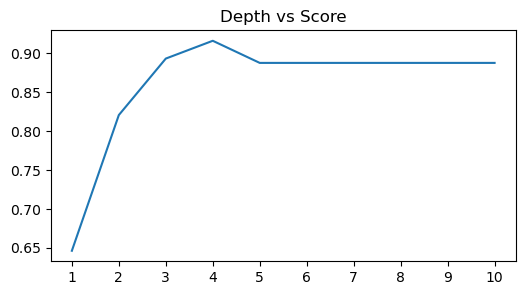

In [13]:
score_values, depth_values = [],[]
for i in range(10):
    clf = tree.DecisionTreeClassifier(criterion='gini', max_depth = i+1, random_state=0)
    score = cross_val_score(clf, X, y, cv=5, scoring='accuracy').mean()
    score_values.append(score)
    depth_values.append(i+1)

import matplotlib.pyplot as plt 
plt.figure(figsize=(6,3))
plt.plot(depth_values, score_values)
plt.title('Depth vs Score')
plt.xticks(depth_values)
plt.show()

In [31]:
import numpy as np 
imp = clf.fit(X, y).feature_importances_
# get the rank
rank_idx = np.argsort(imp)[::-1]
for i, idx in enumerate(rank_idx):
    print('%s> %s %s %.3f'%(i+1, wine.feature_names[idx], '\t', imp[idx]))


1> proline 	 0.382
2> od280/od315_of_diluted_wines 	 0.312
3> flavanoids 	 0.141
4> hue 	 0.058
5> color_intensity 	 0.035
6> magnesium 	 0.033
7> malic_acid 	 0.026
8> alcohol 	 0.013
9> proanthocyanins 	 0.000
10> nonflavanoid_phenols 	 0.000
11> total_phenols 	 0.000
12> alcalinity_of_ash 	 0.000
13> ash 	 0.000


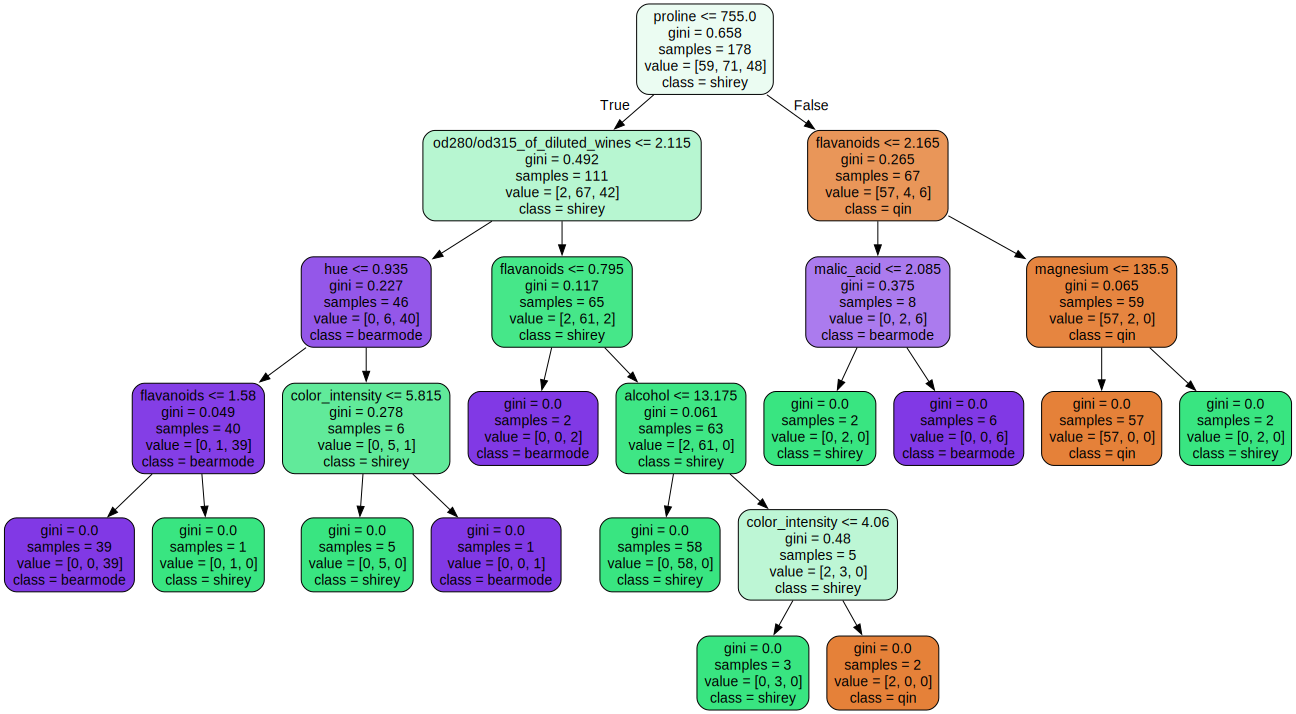

In [33]:
import graphviz 
dot_data = tree.export_graphviz(
    clf,
    out_file=None,
    feature_names = wine.feature_names,
    class_names = ['qin', 'shirey','bearmode'],
    filled = True,
    rounded = True
)
graph = graphviz.Source(dot_data)
graph


In [35]:
gini_values = np.linspace(0, 0.5, 20)
parameters = dict(
    criterion = ['gini', 'entropy'],
    max_depth = [*range(1,10)],
    splitter = ('best', 'random'),
    min_samples_leaf = [*range(1,50,5)],
    min_impurity_decrease = [*np.linspace(0,0.5,20)]
)
clf = tree.DecisionTreeClassifier(random_state=0)
from sklearn.model_selection import GridSearchCV 
gs = GridSearchCV(clf, parameters, cv=5)
gs.fit(X_train, y_train)
gs.best_params_

{'criterion': 'gini',
 'max_depth': 2,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'splitter': 'random'}

In [36]:
gs.best_score_

0.9356666666666665

In [38]:
from matplotlib.colors import ListedColormap 
from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import StandardScaler 
from sklearn.datasets import make_moons, make_circles, make_classification
from sklearn.tree import DecisionTreeClassifier

In [39]:
X, y = make_classification(n_samples = 100,
                           n_features = 2, 
                           n_redundant=0, 
                           n_informative = 2, 
                           random_state=1, 
                           n_clusters_per_class =1 )

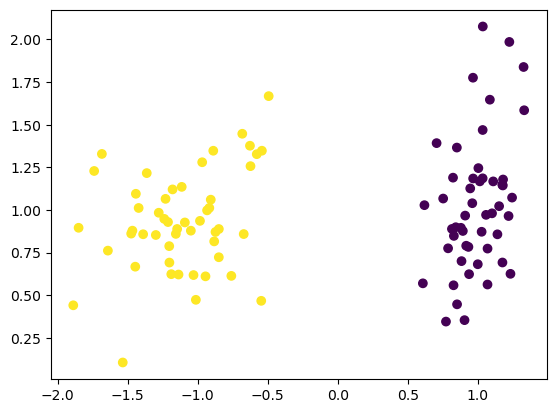

In [40]:
plt.scatter(X[:,0], X[:,1], c=y, cmap='viridis', label='X')
plt.show()

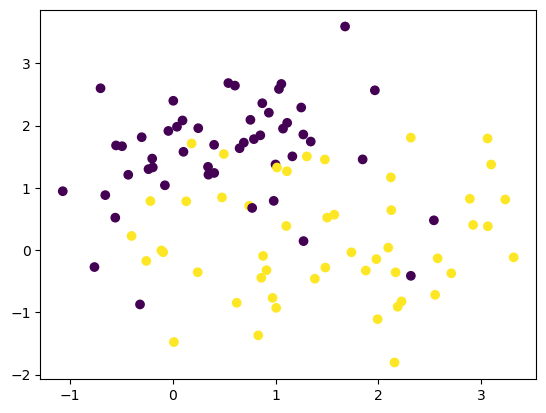

In [65]:
rng = np.random.RandomState(seed=2)
X += 2* rng.uniform(size=X.shape)
plt.scatter(X[:, 0], X[:,1], label='X', c=y)
plt.show()

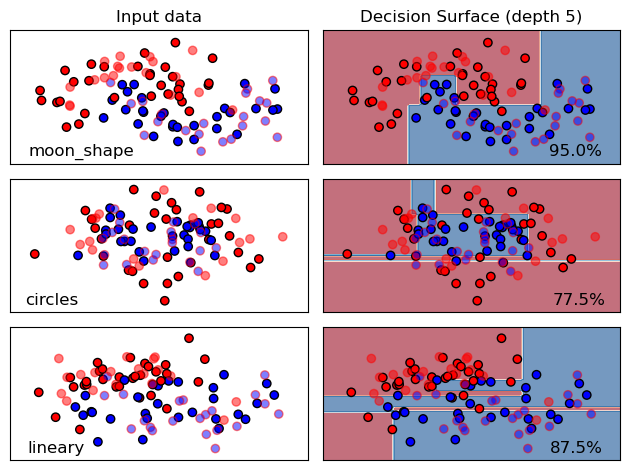

In [67]:
lineary_separable =(X, y)
dataset_names=['moon_shape', 'circles', 'lineary']
datasets = [make_moons(noise=0.3, random_state=0),
            make_circles(noise=0.3, random_state=0, factor=0.5),
            lineary_separable]
# 3 datasets are in the same format like (2-dim array, 1-dim array)
i=1
for ds_index, ds in enumerate(datasets):
    X, y = ds
    X= StandardScaler().fit_transform(X)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

    x1_min, x1_max = X[:,0].min()-0.5, X[:,0].max()+0.5
    x2_min, x2_max = X[:,1].min()-0.5, X[:,1].max()+0.5
    xx1, xx2 = np.meshgrid(np.linspace(x1_min, x1_max,100),
                                np.linspace(x2_min, x2_max,100))
    cm = plt.cm.RdBu
    cm_bright = ListedColormap(['#FF0000', '#0000FF'])
    ax = plt.subplot(len(datasets), 2, i)

    if ds_index == 0:
        ax.set_title('Input data')
    ax.scatter(X_train[:,0], X_train[:,1], c=y_train, 
               cmap = cm_bright, edgecolors='k')
    ax.scatter(X_test[:,0], X_test[:,1], c=y_test, 
               cmap = cm_bright, edgecolors='r', alpha=0.5)
    ax.text(xx1.min()+0.3, xx2.min()+0.3, dataset_names[ds_index],
            size=12, horizontalalignment='left')
    ax.set_xlim(xx1.min(), xx1.max())
    ax.set_ylim(xx2.min(), xx2.max())
    ax.set_xticks(())
    ax.set_yticks(())
    i += 1

    ax = plt.subplot(len(datasets),2,i)
    clf = DecisionTreeClassifier(max_depth=5)
    clf.fit(X_train, y_train)
    score = clf.score(X_test, y_test)

    Z = clf.fit(X_train, y_train).predict(np.c_[xx1.ravel(), xx2.ravel()])
    Z = Z.reshape(xx1.shape)
    ax.contourf(xx1, xx2, Z, cmap= cm, alpha=0.6)

    ax.scatter(X_train[:,0], X_train[:,1], c=y_train,
               cmap=cm_bright, edgecolors='k')
    ax.scatter(X_test[:,0], X_test[:,1], c=y_test,
               cmap=cm_bright, edgecolors='r', alpha=0.5)
    if ds_index == 0:
        ax.set_title(f'Decision Surface (depth {clf.max_depth})')
    ax.text(xx1.max()-0.3, xx2.min()+0.3, (f'{score*100}%'),
            size=12, horizontalalignment='right')
    ax.set_xticks(())
    ax.set_yticks(())
    i += 1
plt.tight_layout()
plt.show()


In [57]:
np.c_[xx1.ravel(), xx2.ravel()]

array([[-2.55161935, -2.64337167],
       [-2.50164339, -2.64337167],
       [-2.45166744, -2.64337167],
       ...,
       [ 2.29604872,  2.77694191],
       [ 2.34602468,  2.77694191],
       [ 2.39600064,  2.77694191]])